In [1]:
import warnings
warnings.filterwarnings("ignore")

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.io import wavfile
from scipy.io.wavfile import read as read_wav
import librosa
import librosa.display
import IPython.display as ipd

from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [2]:
dataset_path = '../input/synthetic-speech-commands-dataset/augmented_dataset/augmented_dataset/'

classes = []
items = os.listdir(dataset_path)
index = 0
while index < len(items):
    item = items[index]
    if os.path.isdir(os.path.join(dataset_path, item)):
        classes.append(item)
    index += 1

print(classes)

['no', 'two', 'four', 'five', 'nine', 'right', 'off', 'yes', 'six', 'dog', 'left', 'bird', 'marvel', 'wow', 'zero', 'eight', 'bed', 'go', 'house', 'tree', 'seven', 'on', 'three', 'one', 'down', 'stop', 'up', 'happy', 'cat', 'sheila']


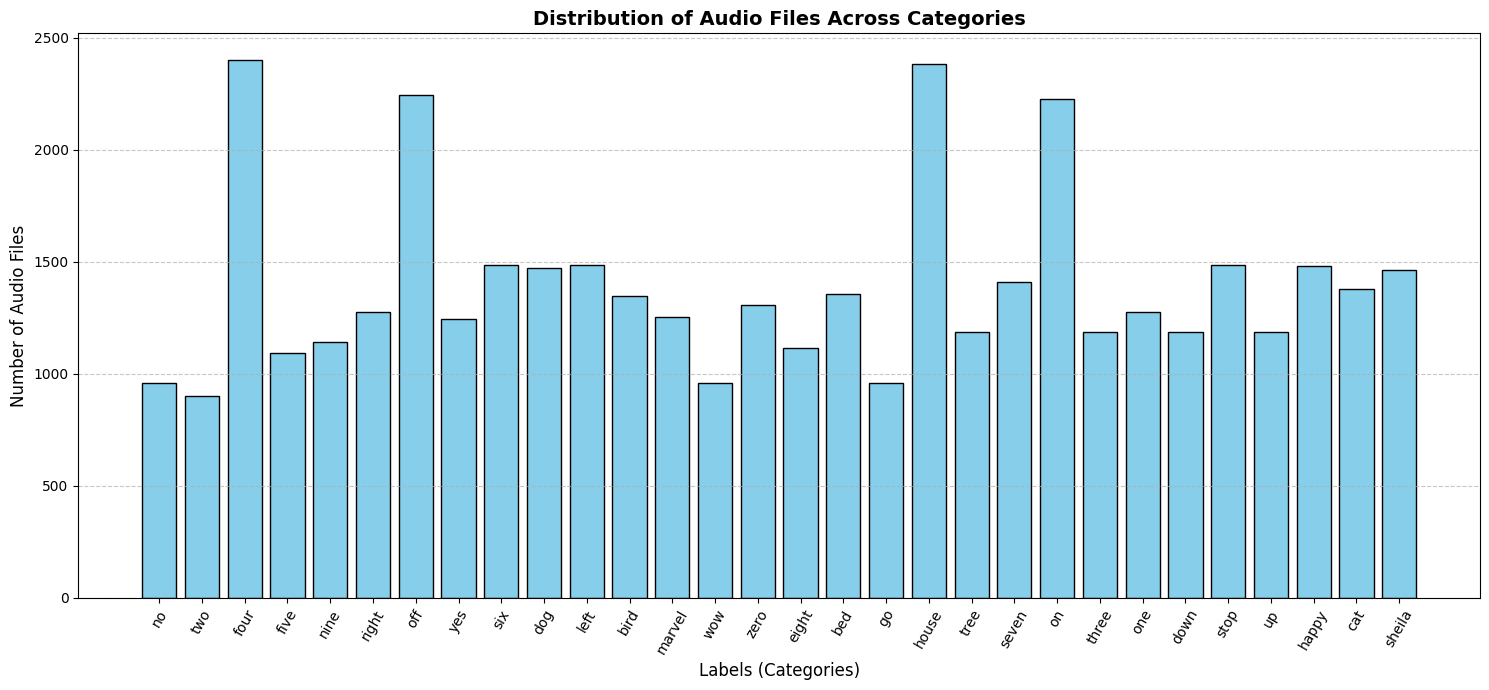

In [3]:
train_directory = '../input/synthetic-speech-commands-dataset/augmented_dataset/augmented_dataset'

categories = [category for category in os.listdir(train_directory) if os.path.isdir(os.path.join(train_directory, category))]

file_counts = []
for category in categories:
    category_path = os.path.join(train_directory, category)
    file_counts.append(len(os.listdir(category_path)))

plt.figure(figsize=(15, 7))
plt.bar(categories, file_counts, color='skyblue', edgecolor='black')
plt.xticks(rotation=60, fontsize=10)
plt.xlabel('Labels (Categories)', fontsize=12)
plt.ylabel('Number of Audio Files', fontsize=12)
plt.title('Distribution of Audio Files Across Categories', fontsize=14, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Audio samples shape: (16000,)
Sample rate: 16000 Hz


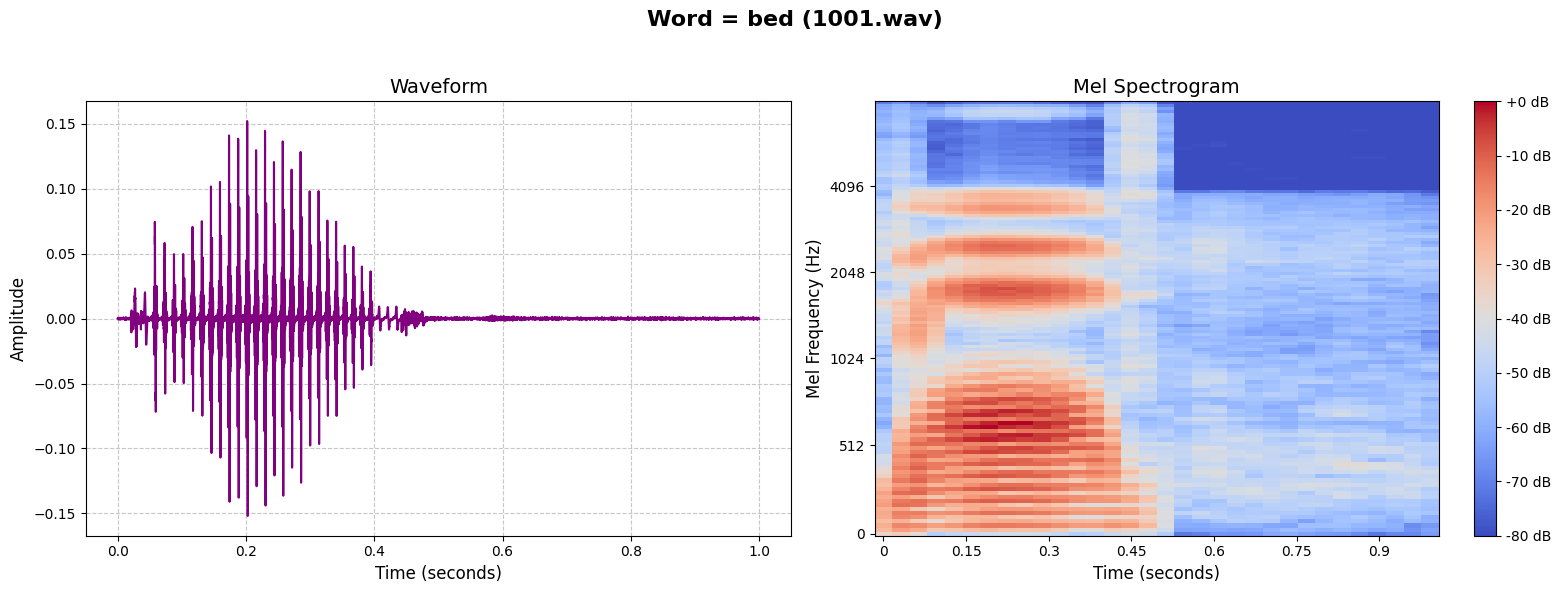

In [4]:
audio_path = '../input/synthetic-speech-commands-dataset/augmented_dataset/augmented_dataset/bed/1001.wav'
samples, sample_rate = librosa.load(audio_path, sr=16000)

print(f"Audio samples shape: {samples.shape}")
print(f"Sample rate: {sample_rate} Hz")

plt.figure(figsize=(16, 6))
plt.suptitle(f"Word = bed ({os.path.basename(audio_path)})", fontsize=16, weight='bold')

plt.subplot(1, 2, 1)
time_axis = np.arange(0, len(samples)) / sample_rate
plt.plot(time_axis, samples, color='purple')
plt.title("Waveform", fontsize=14)
plt.xlabel("Time (seconds)", fontsize=12)
plt.ylabel("Amplitude", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.7)

plt.subplot(1, 2, 2)
S = librosa.feature.melspectrogram(y=samples, sr=sample_rate, n_mels=128, fmax=8000)
S_dB = librosa.power_to_db(S, ref=np.max)
librosa.display.specshow(S_dB, sr=sample_rate, x_axis="time", y_axis="mel", cmap="coolwarm")
plt.colorbar(format="%+2.0f dB", ax=plt.gca())
plt.title("Mel Spectrogram", fontsize=14)
plt.xlabel("Time (seconds)", fontsize=12)
plt.ylabel("Mel Frequency (Hz)", fontsize=12)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Audio samples shape: (16000,)
Sample rate: 16000 Hz


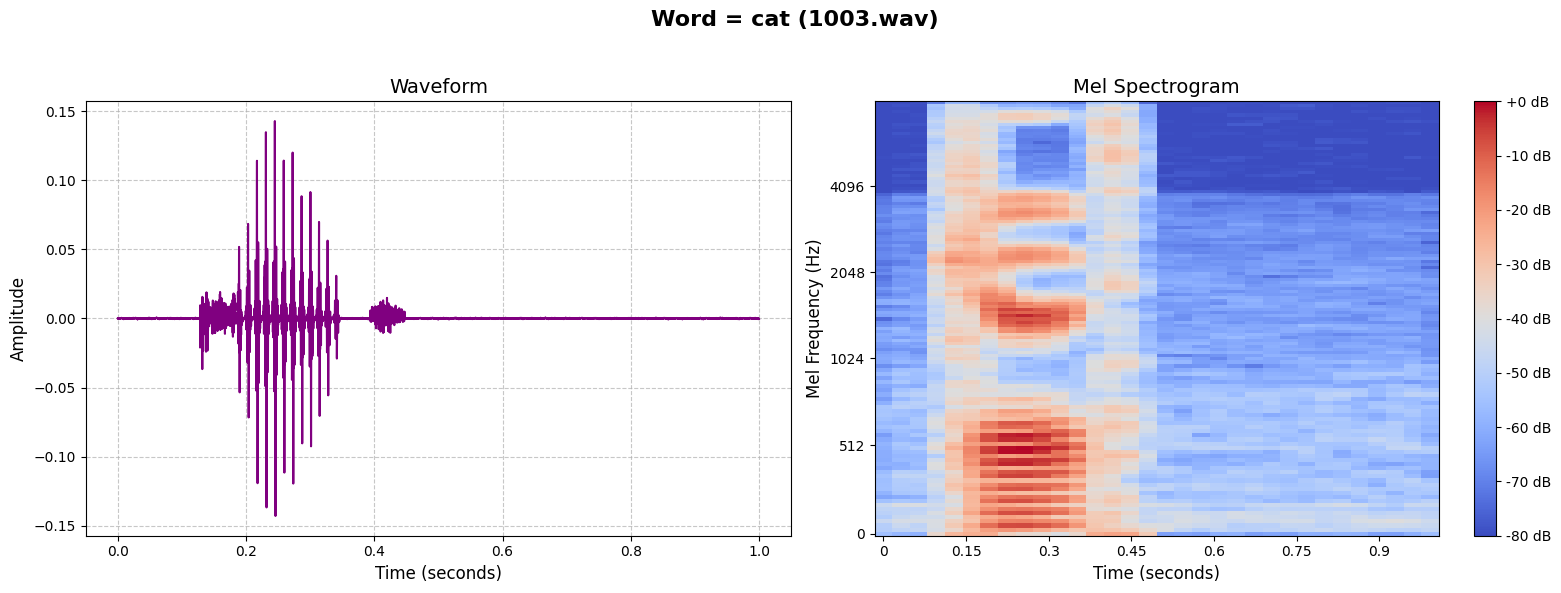

In [5]:
audio_path = '../input/synthetic-speech-commands-dataset/augmented_dataset/augmented_dataset/cat/1003.wav'

samples, sample_rate = librosa.load(audio_path, sr=16000)

print(f"Audio samples shape: {samples.shape}")
print(f"Sample rate: {sample_rate} Hz")

plt.figure(figsize=(16, 6))
plt.suptitle(f"Word = cat ({os.path.basename(audio_path)})", fontsize=16, weight='bold')

plt.subplot(1, 2, 1)
time_axis = np.arange(0, len(samples)) / sample_rate
plt.plot(time_axis, samples, color='purple')
plt.title("Waveform", fontsize=14)
plt.xlabel("Time (seconds)", fontsize=12)
plt.ylabel("Amplitude", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.7)

plt.subplot(1, 2, 2)
S = librosa.feature.melspectrogram(y=samples, sr=sample_rate, n_mels=128, fmax=8000)
S_dB = librosa.power_to_db(S, ref=np.max)
librosa.display.specshow(S_dB, sr=sample_rate, x_axis="time", y_axis="mel", cmap="coolwarm")
plt.colorbar(format="%+2.0f dB", ax=plt.gca())
plt.title("Mel Spectrogram", fontsize=14)
plt.xlabel("Time (seconds)", fontsize=12)
plt.ylabel("Mel Frequency (Hz)", fontsize=12)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


Audio samples shape: (16000,)
Sample rate: 16000 Hz


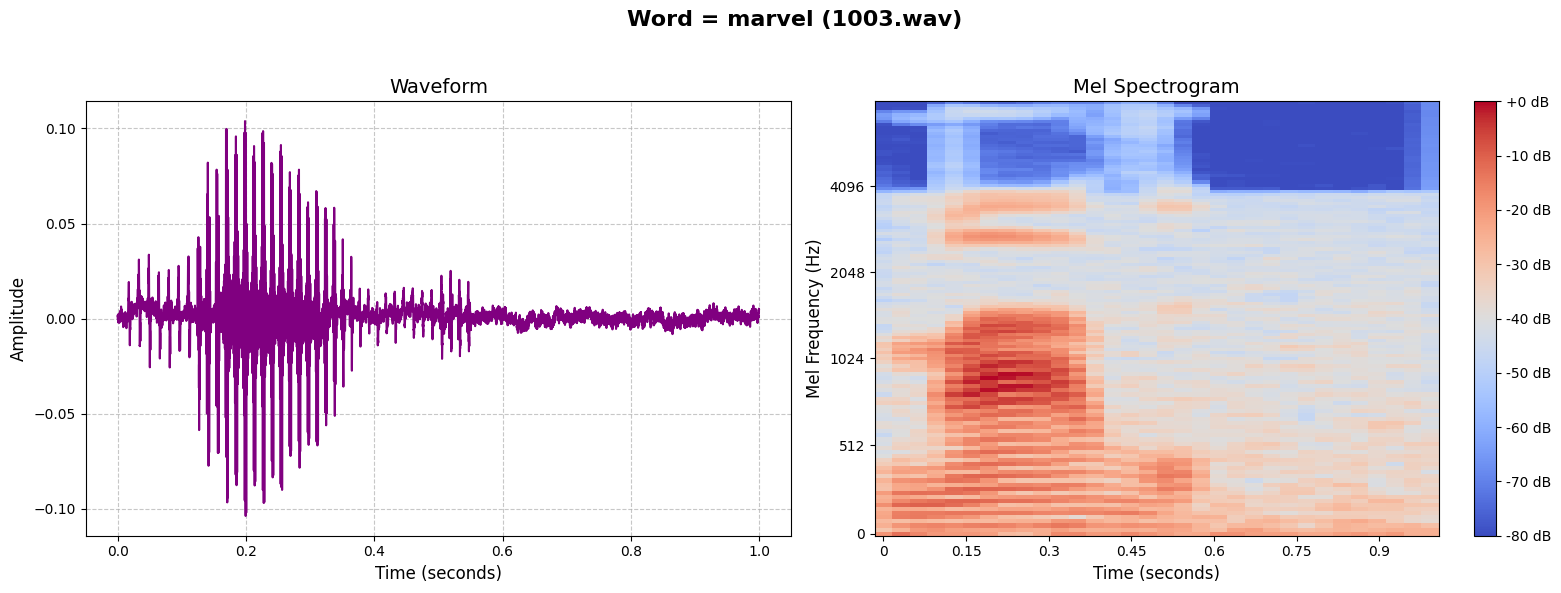

In [6]:
audio_path = '../input/synthetic-speech-commands-dataset/augmented_dataset/augmented_dataset/marvel/1003.wav'

samples, sample_rate = librosa.load(audio_path, sr=16000)

print(f"Audio samples shape: {samples.shape}")
print(f"Sample rate: {sample_rate} Hz")

plt.figure(figsize=(16, 6))
plt.suptitle(f"Word = marvel ({os.path.basename(audio_path)})", fontsize=16, weight='bold')

plt.subplot(1, 2, 1)
time_axis = np.arange(0, len(samples)) / sample_rate
plt.plot(time_axis, samples, color='purple')
plt.title("Waveform", fontsize=14)
plt.xlabel("Time (seconds)", fontsize=12)
plt.ylabel("Amplitude", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.7)

plt.subplot(1, 2, 2)
S = librosa.feature.melspectrogram(y=samples, sr=sample_rate, n_mels=128, fmax=8000)
S_dB = librosa.power_to_db(S, ref=np.max)
librosa.display.specshow(S_dB, sr=sample_rate, x_axis="time", y_axis="mel", cmap="coolwarm")
plt.colorbar(format="%+2.0f dB", ax=plt.gca())
plt.title("Mel Spectrogram", fontsize=14)
plt.xlabel("Time (seconds)", fontsize=12)
plt.ylabel("Mel Frequency (Hz)", fontsize=12)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Audio samples shape: (16000,)
Sample rate: 16000 Hz


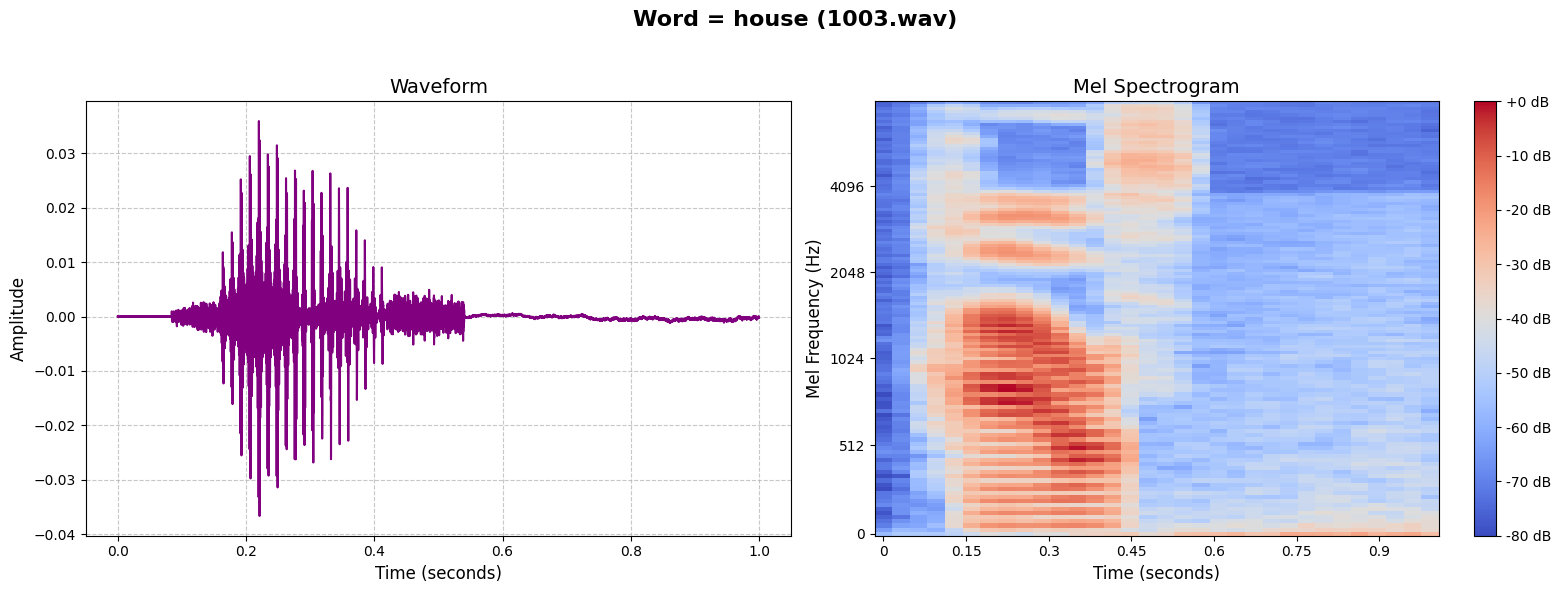

In [7]:
audio_path = '../input/synthetic-speech-commands-dataset/augmented_dataset/augmented_dataset/house/1003.wav'

samples, sample_rate = librosa.load(audio_path, sr=16000)

print(f"Audio samples shape: {samples.shape}")
print(f"Sample rate: {sample_rate} Hz")

plt.figure(figsize=(16, 6))
plt.suptitle(f"Word = house ({os.path.basename(audio_path)})", fontsize=16, weight='bold')

plt.subplot(1, 2, 1)
time_axis = np.arange(0, len(samples)) / sample_rate
plt.plot(time_axis, samples, color='purple')
plt.title("Waveform", fontsize=14)
plt.xlabel("Time (seconds)", fontsize=12)
plt.ylabel("Amplitude", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.7)

plt.subplot(1, 2, 2)
S = librosa.feature.melspectrogram(y=samples, sr=sample_rate, n_mels=128, fmax=8000)
S_dB = librosa.power_to_db(S, ref=np.max)
librosa.display.specshow(S_dB, sr=sample_rate, x_axis="time", y_axis="mel", cmap="coolwarm")
plt.colorbar(format="%+2.0f dB", ax=plt.gca())
plt.title("Mel Spectrogram", fontsize=14)
plt.xlabel("Time (seconds)", fontsize=12)
plt.ylabel("Mel Frequency (Hz)", fontsize=12)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Audio samples shape: (16000,)
Sample rate: 16000 Hz


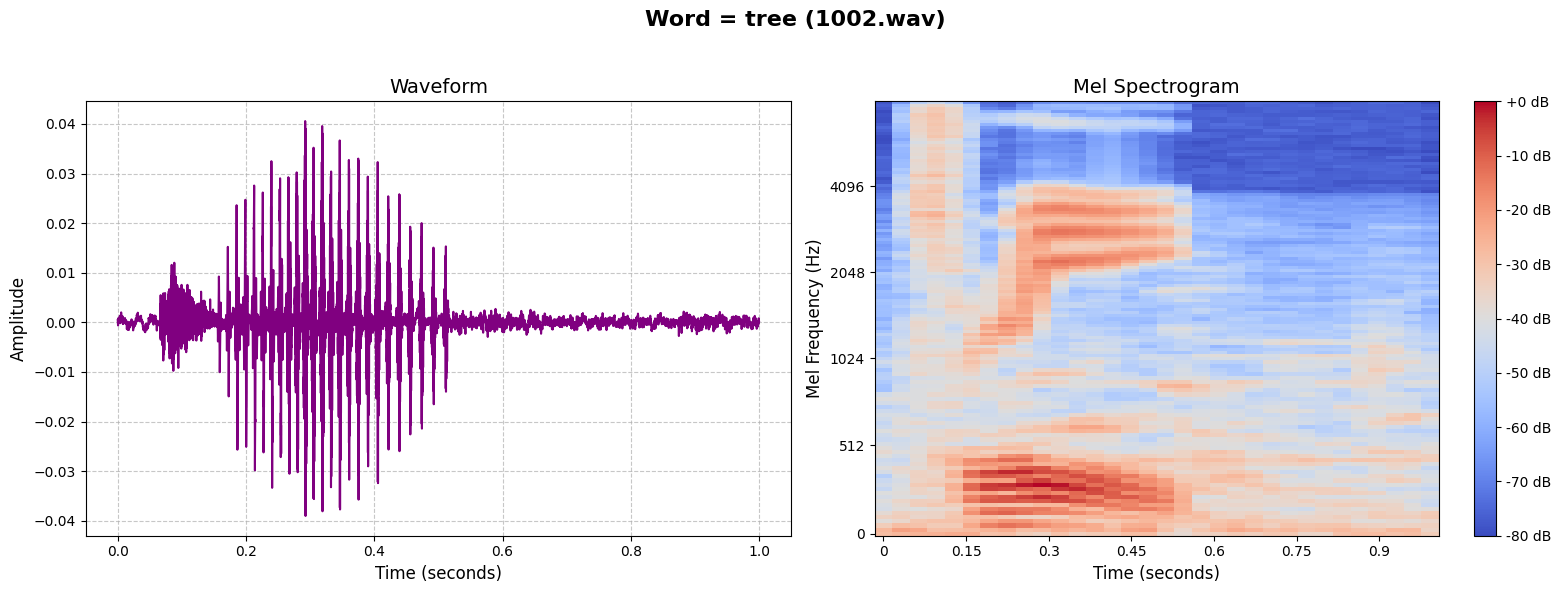

In [8]:
audio_path = '../input/synthetic-speech-commands-dataset/augmented_dataset/augmented_dataset/tree/1002.wav'

samples, sample_rate = librosa.load(audio_path, sr=16000)

print(f"Audio samples shape: {samples.shape}")
print(f"Sample rate: {sample_rate} Hz")

plt.figure(figsize=(16, 6))
plt.suptitle(f"Word = tree ({os.path.basename(audio_path)})", fontsize=16, weight='bold')

plt.subplot(1, 2, 1)
time_axis = np.arange(0, len(samples)) / sample_rate
plt.plot(time_axis, samples, color='purple')
plt.title("Waveform", fontsize=14)
plt.xlabel("Time (seconds)", fontsize=12)
plt.ylabel("Amplitude", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.7)

plt.subplot(1, 2, 2)
S = librosa.feature.melspectrogram(y=samples, sr=sample_rate, n_mels=128, fmax=8000)
S_dB = librosa.power_to_db(S, ref=np.max)
librosa.display.specshow(S_dB, sr=sample_rate, x_axis="time", y_axis="mel", cmap="coolwarm")
plt.colorbar(format="%+2.0f dB", ax=plt.gca())
plt.title("Mel Spectrogram", fontsize=14)
plt.xlabel("Time (seconds)", fontsize=12)
plt.ylabel("Mel Frequency (Hz)", fontsize=12)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Audio samples shape: (16000,)
Sample rate: 16000 Hz


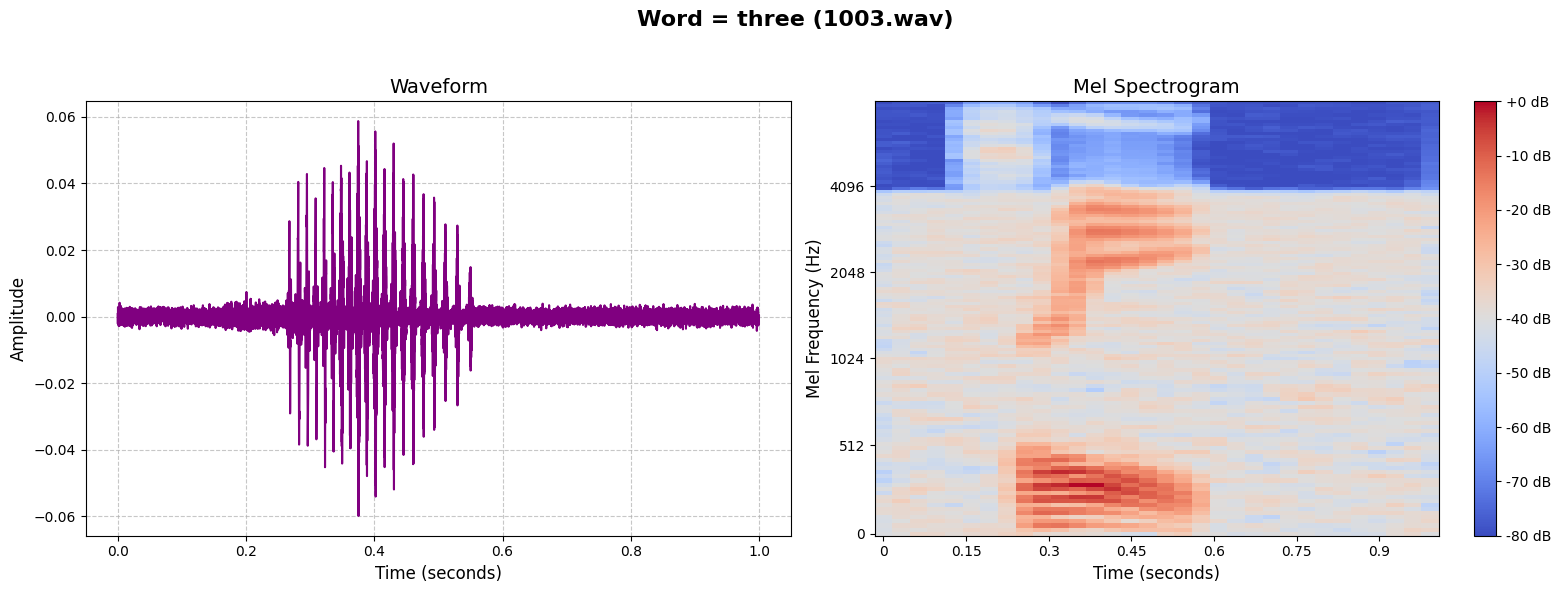

In [9]:
audio_path = '../input/synthetic-speech-commands-dataset/augmented_dataset/augmented_dataset/three/1003.wav'

samples, sample_rate = librosa.load(audio_path, sr=16000)

print(f"Audio samples shape: {samples.shape}")
print(f"Sample rate: {sample_rate} Hz")

plt.figure(figsize=(16, 6))
plt.suptitle(f"Word = three ({os.path.basename(audio_path)})", fontsize=16, weight='bold')

plt.subplot(1, 2, 1)
time_axis = np.arange(0, len(samples)) / sample_rate
plt.plot(time_axis, samples, color='purple')
plt.title("Waveform", fontsize=14)
plt.xlabel("Time (seconds)", fontsize=12)
plt.ylabel("Amplitude", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.7)

plt.subplot(1, 2, 2)
S = librosa.feature.melspectrogram(y=samples, sr=sample_rate, n_mels=128, fmax=8000)
S_dB = librosa.power_to_db(S, ref=np.max)
librosa.display.specshow(S_dB, sr=sample_rate, x_axis="time", y_axis="mel", cmap="coolwarm")
plt.colorbar(format="%+2.0f dB", ax=plt.gca())
plt.title("Mel Spectrogram", fontsize=14)
plt.xlabel("Time (seconds)", fontsize=12)
plt.ylabel("Mel Frequency (Hz)", fontsize=12)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

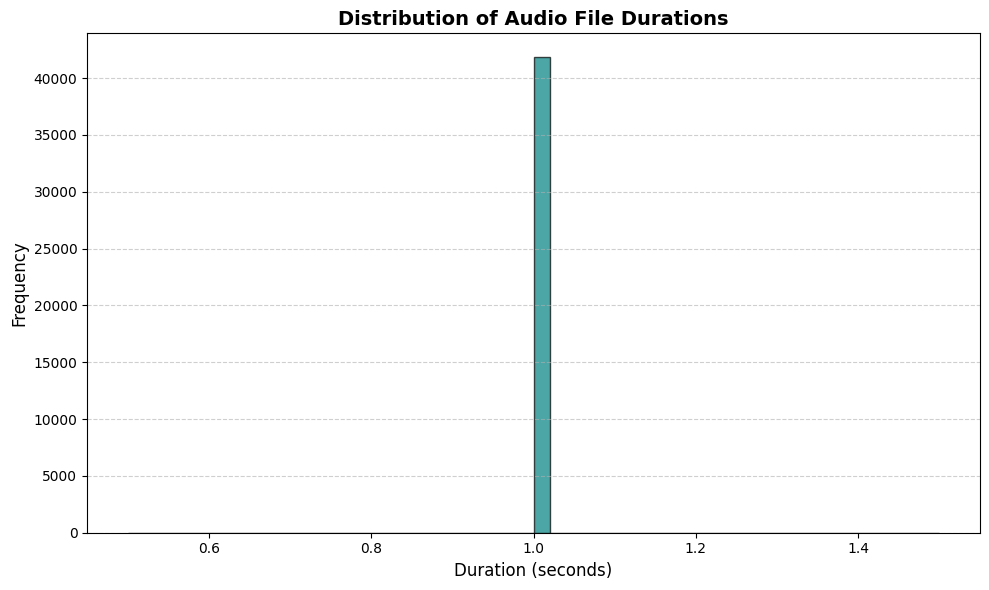

In [10]:
recording_durations = []

for category in os.listdir(dataset_path):
    category_path = os.path.join(dataset_path, category)
    
    if os.path.isdir(category_path):
        for file in os.listdir(category_path):
            if file.endswith('.wav'):
                file_path = os.path.join(category_path, file)
                
                try:
                    sample_rate, audio_data = read_wav(file_path)
                    duration = len(audio_data) / sample_rate
                    recording_durations.append(duration)
                except Exception as e:
                    print(f"Error processing file {file}: {e}")

plt.figure(figsize=(10, 6))
plt.hist(recording_durations, bins=50, color='teal', edgecolor='black', alpha=0.7)
plt.title("Distribution of Audio File Durations", fontsize=14, fontweight='bold')
plt.xlabel("Duration (seconds)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [11]:
audio_data = []
audio_labels = []

for category in classes:
    category_path = os.path.join(train_directory, category)
    print(f"Processing category: {category}")
    
    for file_name in os.listdir(category_path):
        if file_name.endswith('.wav'):
            file_path = os.path.join(category_path, file_name)
            
            audio_samples, sr = librosa.load(file_path, sr=8000)
            if len(audio_samples) == 8000:
                audio_data.append(audio_samples)
                audio_labels.append(category)

print(f"Total processed audio files: {len(audio_data)}")
print(f"Unique labels: {set(audio_labels)}")

Processing category: no
Processing category: two
Processing category: four
Processing category: five
Processing category: nine
Processing category: right
Processing category: off
Processing category: yes
Processing category: six
Processing category: dog
Processing category: left
Processing category: bird
Processing category: marvel
Processing category: wow
Processing category: zero
Processing category: eight
Processing category: bed
Processing category: go
Processing category: house
Processing category: tree
Processing category: seven
Processing category: on
Processing category: three
Processing category: one
Processing category: down
Processing category: stop
Processing category: up
Processing category: happy
Processing category: cat
Processing category: sheila
Total processed audio files: 41849
Unique labels: {'nine', 'four', 'bed', 'tree', 'wow', 'zero', 'up', 'marvel', 'five', 'house', 'right', 'down', 'six', 'off', 'dog', 'seven', 'cat', 'go', 'no', 'on', 'one', 'bird', 'left', 's

In [12]:
le = LabelEncoder()
y = le.fit_transform(audio_labels)
classes = list(le.classes_)
y1 = to_categorical(y, num_classes=len(classes))

In [13]:
lab = pd.get_dummies(audio_labels)

In [14]:
lab.columns

Index(['bed', 'bird', 'cat', 'dog', 'down', 'eight', 'five', 'four', 'go',
       'happy', 'house', 'left', 'marvel', 'nine', 'no', 'off', 'on', 'one',
       'right', 'seven', 'sheila', 'six', 'stop', 'three', 'tree', 'two', 'up',
       'wow', 'yes', 'zero'],
      dtype='object')

In [15]:
len(lab.columns)

30

In [16]:
y1.shape

(41849, 30)

In [17]:
from sklearn.model_selection import train_test_split


X = np.array(audio_data)
X_reshaped = X.reshape(X.shape[0], 8000, 1)
y = np.array(y1)

x_train, x_test, y_train, y_test = train_test_split(X_reshaped, y, test_size=0.2, shuffle=True)

print(f"Training data shape: {x_train.shape}")
print(f"Testing data shape: {x_test.shape}")

Training data shape: (33479, 8000, 1)
Testing data shape: (8370, 8000, 1)


In [18]:
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [19]:
model = Sequential()

# first convolutional layer
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(8000, 1)))
model.add(MaxPooling1D(pool_size=2))

# second convolutional layer
model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))

# third convolutional layer
model.add(Conv1D(filters=256, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(classes), activation='softmax'))
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 7998, 64)       │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 3999, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 3997, 128)      │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 1998, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 1996, 256)      │        98,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 998, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 255488)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    32,702,592 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 30)             │         3,870 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,829,982 (125.24 MB)

 Trainable params: 32,829,982 (125.24 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/10


I0000 00:00:1735926475.735965     115 service.cc:145] XLA service 0x78cf7c005ce0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1735926475.736015     115 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1735926475.736019     115 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


   3/1047 ━━━━━━━━━━━━━━━━━━━━ 1:01 59ms/step - accuracy: 0.0243 - loss: 3.4047    

I0000 00:00:1735926481.036428     115 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1047/1047 ━━━━━━━━━━━━━━━━━━━━ 73s 63ms/step - accuracy: 0.1728 - loss: 2.9014 - val_accuracy: 0.5446 - val_loss: 1.5209
Epoch 2/10
1047/1047 ━━━━━━━━━━━━━━━━━━━━ 64s 61ms/step - accuracy: 0.4725 - loss: 1.6731 - val_accuracy: 0.6608 - val_loss: 1.1281
Epoch 3/10
1047/1047 ━━━━━━━━━━━━━━━━━━━━ 66s 63ms/step - accuracy: 0.5847 - loss: 1.2805 - val_accuracy: 0.7123 - val_loss: 0.9459
Epoch 4/10
1047/1047 ━━━━━━━━━━━━━━━━━━━━ 66s 63ms/step - accuracy: 0.6540 - loss: 1.0481 - val_accuracy: 0.7434 - val_loss: 0.8259
Epoch 5/10
1047/1047 ━━━━━━━━━━━━━━━━━━━━ 66s 63ms/step - accuracy: 0.6972 - loss: 0.9151 - val_accuracy: 0.7503 - val_loss: 0.7973
Epoch 6/10
1047/1047 ━━━━━━━━━━━━━━━━━━━━ 66s 63ms/step - accuracy: 0.7293 - loss: 0.7932 - val_accuracy: 0.7575 - val_loss: 0.7727
Epoch 7/10
1047/1047 ━━━━━━━━━━━━━━━━━━━━ 66s 63ms/step - accuracy: 0.7545 - loss: 0.7125 - val_accuracy: 0.7765 - val_loss: 0.7279
Epoch 8/10
1047/1047 ━━━━━━━━━━━━━━━━━━━━ 66s 63ms/step - accuracy: 0.7763 - loss: 0.64

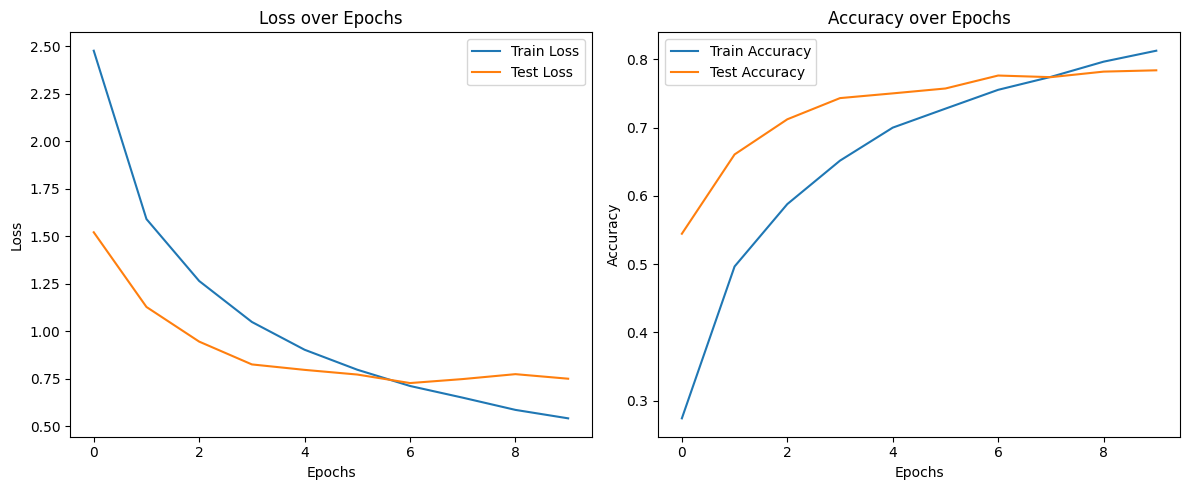

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].plot(history.history['loss'], label='Train Loss')
axes[0].plot(history.history['val_loss'], label='Test Loss')
axes[0].set_title('Loss over Epochs')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Loss')
axes[0].legend()
axes[1].plot(history.history['accuracy'], label='Train Accuracy')
axes[1].plot(history.history['val_accuracy'], label='Test Accuracy')
axes[1].set_title('Accuracy over Epochs')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Accuracy')
axes[1].legend()
plt.tight_layout()
plt.show()

In [29]:
model = Sequential()

# first convolutional layer
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(8000, 1)))

# second convolutional layer
model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))

# third convolutional layer
model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))

# fourth convolutional layer
model.add(Conv1D(filters=256, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))

# fifth convolutional layer
model.add(Conv1D(filters=256, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(classes), activation='softmax'))
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_15 (Conv1D)              │ (None, 7998, 64)       │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_16 (Conv1D)              │ (None, 7996, 128)      │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_12 (MaxPooling1D) │ (None, 3998, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_17 (Conv1D)              │ (None, 3996, 128)      │        49,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_13 (MaxPooling1D) │ (None, 1998, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_18 (Conv1D)              │ (None, 1996, 256)      │        98,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_14 (MaxPooling1D) │ (None, 998, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_19 (Conv1D)              │ (None, 996, 256)       │       196,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_15 (MaxPooling1D) │ (None, 498, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 127488)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │    16,318,592 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 30)             │         3,870 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,692,126 (63.68 MB)

 Trainable params: 16,692,126 (63.68 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/10
1047/1047 ━━━━━━━━━━━━━━━━━━━━ 171s 152ms/step - accuracy: 0.0504 - loss: 3.3827 - val_accuracy: 0.0564 - val_loss: 3.3642
Epoch 2/10
1047/1047 ━━━━━━━━━━━━━━━━━━━━ 149s 143ms/step - accuracy: 0.0571 - loss: 3.3686 - val_accuracy: 0.0564 - val_loss: 3.3634
Epoch 3/10
1047/1047 ━━━━━━━━━━━━━━━━━━━━ 149s 142ms/step - accuracy: 0.0553 - loss: 3.3658 - val_accuracy: 0.0564 - val_loss: 3.3631
Epoch 4/10
1047/1047 ━━━━━━━━━━━━━━━━━━━━ 149s 142ms/step - accuracy: 0.0588 - loss: 3.3660 - val_accuracy: 0.0564 - val_loss: 3.3628
Epoch 5/10
1047/1047 ━━━━━━━━━━━━━━━━━━━━ 149s 142ms/step - accuracy: 0.0540 - loss: 3.3662 - val_accuracy: 0.0564 - val_loss: 3.3631
Epoch 6/10
1047/1047 ━━━━━━━━━━━━━━━━━━━━ 149s 142ms/step - accuracy: 0.0588 - loss: 3.3649 - val_accuracy: 0.0599 - val_loss: 3.3633
Epoch 7/10
1047/1047 ━━━━━━━━━━━━━━━━━━━━ 149s 142ms/step - accuracy: 0.0582 - loss: 3.3657 - val_accuracy: 0.0564 - val_loss: 3.3628
Epoch 8/10
1047/1047 ━━━━━━━━━━━━━━━━━━━━ 149s 142ms/step - ac

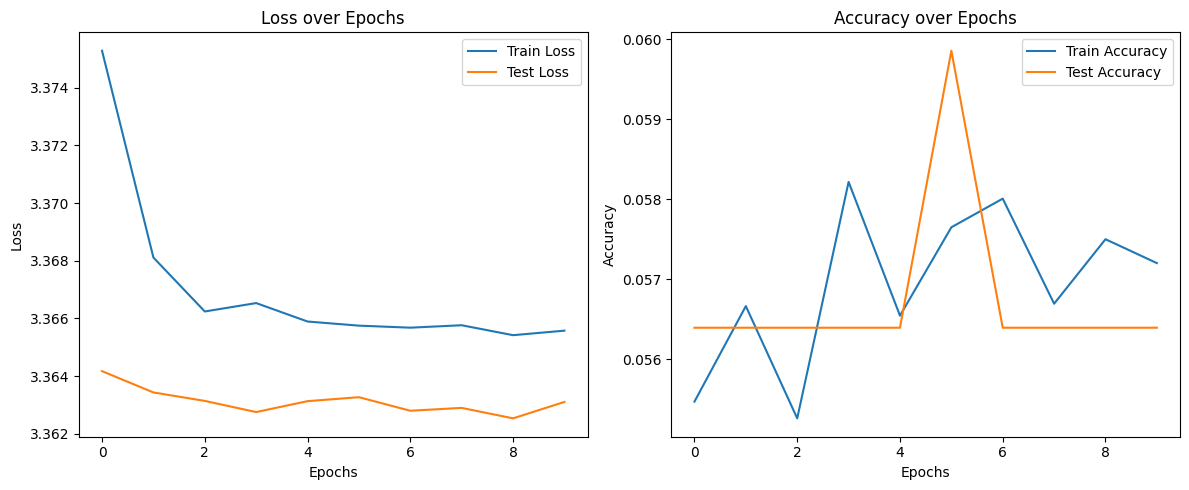

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].plot(history.history['loss'], label='Train Loss')
axes[0].plot(history.history['val_loss'], label='Test Loss')
axes[0].set_title('Loss over Epochs')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Loss')
axes[0].legend()
axes[1].plot(history.history['accuracy'], label='Train Accuracy')
axes[1].plot(history.history['val_accuracy'], label='Test Accuracy')
axes[1].set_title('Accuracy over Epochs')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Accuracy')
axes[1].legend()
plt.tight_layout()
plt.show()

In [26]:
model = Sequential()

# first convolutional layer
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(8000, 1)))

# second convolutional layer
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))

# third convolutional layer
model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))

# fourth convolutional layer
model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))

# fifth convolutional layer
model.add(Conv1D(filters=256, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))

# sixth convolutional layer
model.add(Conv1D(filters=256, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))

# seventh convolutional layer
model.add(Conv1D(filters=256, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(classes), activation='softmax'))
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_8 (Conv1D)               │ (None, 7998, 64)       │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_9 (Conv1D)               │ (None, 7996, 64)       │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_6 (MaxPooling1D)  │ (None, 3998, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_10 (Conv1D)              │ (None, 3996, 128)      │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_7 (MaxPooling1D)  │ (None, 1998, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_11 (Conv1D)              │ (None, 1996, 128)      │        49,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_8 (MaxPooling1D)  │ (None, 998, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_12 (Conv1D)              │ (None, 996, 256)       │        98,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_9 (MaxPooling1D)  │ (None, 498, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_13 (Conv1D)              │ (None, 496, 256)       │       196,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_10 (MaxPooling1D) │ (None, 248, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_14 (Conv1D)              │ (None, 246, 256)       │       196,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_11 (MaxPooling1D) │ (None, 123, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 31488)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     4,030,592 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 30)             │         3,870 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,613,342 (17.60 MB)

 Trainable params: 4,613,342 (17.60 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/10
1047/1047 ━━━━━━━━━━━━━━━━━━━━ 106s 95ms/step - accuracy: 0.0541 - loss: 3.3835 - val_accuracy: 0.0564 - val_loss: 3.3653
Epoch 2/10
1047/1047 ━━━━━━━━━━━━━━━━━━━━ 93s 89ms/step - accuracy: 0.0552 - loss: 3.3700 - val_accuracy: 0.0564 - val_loss: 3.3633
Epoch 3/10
1047/1047 ━━━━━━━━━━━━━━━━━━━━ 93s 89ms/step - accuracy: 0.0569 - loss: 3.3670 - val_accuracy: 0.0564 - val_loss: 3.3632
Epoch 4/10
1047/1047 ━━━━━━━━━━━━━━━━━━━━ 93s 89ms/step - accuracy: 0.0549 - loss: 3.3660 - val_accuracy: 0.0564 - val_loss: 3.3630
Epoch 5/10
1047/1047 ━━━━━━━━━━━━━━━━━━━━ 93s 89ms/step - accuracy: 0.0586 - loss: 3.3658 - val_accuracy: 0.0599 - val_loss: 3.3628
Epoch 6/10
1047/1047 ━━━━━━━━━━━━━━━━━━━━ 93s 89ms/step - accuracy: 0.0554 - loss: 3.3636 - val_accuracy: 0.0599 - val_loss: 3.3630
Epoch 7/10
1047/1047 ━━━━━━━━━━━━━━━━━━━━ 93s 89ms/step - accuracy: 0.0576 - loss: 3.3650 - val_accuracy: 0.0564 - val_loss: 3.3627
Epoch 8/10
1047/1047 ━━━━━━━━━━━━━━━━━━━━ 93s 89ms/step - accuracy: 0.0578 

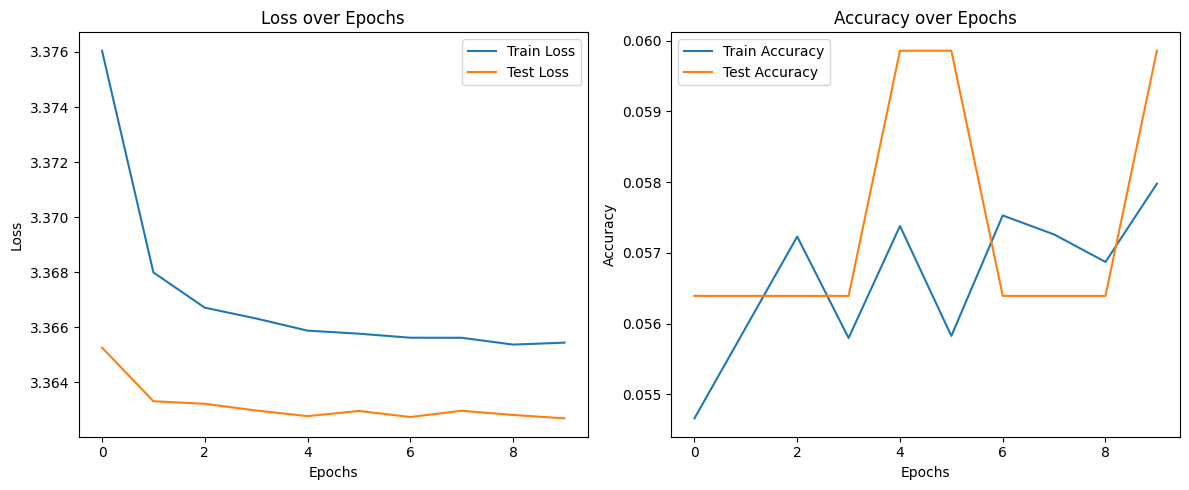

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].plot(history.history['loss'], label='Train Loss')
axes[0].plot(history.history['val_loss'], label='Test Loss')
axes[0].set_title('Loss over Epochs')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Loss')
axes[0].legend()
axes[1].plot(history.history['accuracy'], label='Train Accuracy')
axes[1].plot(history.history['val_accuracy'], label='Test Accuracy')
axes[1].set_title('Accuracy over Epochs')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Accuracy')
axes[1].legend()
plt.tight_layout()
plt.show()